<img src="https://www.superbmytrip.com/blog//UploadedFiles/Blog/9/78dea1d4-4c78-40a2-8bda-d4f191fd9574_How%20to%20Book%20a%20Hotel%20Online%20in%20Easy%20Steps-01.jpg" alt="Alternative text" />

# **import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [ ]:
pd.set_option('display.max_columns', 40)

# **Load Data**

In [ ]:
data = pd.read_csv("hotel_booking.csv")

# **Dataset Overview**

**Dataset Information:**

This dataset includes the following features:

- 1. **hotel**: The name of the hotel associated with the reservation.

- 2. **is_canceled**: Cancellation status of the reservation (1 indicates canceled and 0 indicates not canceled).

- 3. **lead_time**: Time elapsed (in days) between booking date and arrival date.

- 4. **arrival_date_year**: Year of arrival.

- 5. **arrival_date_month**: Month of arrival.

- 6. **arrival_date_week_number**: Week number of arrival.

- 7. **arrival_date_day_of_month**: Day of the month of arrival.

- 8. **stays_in_weekend_nights**: Number of weekend nights stayed.

- 9. **stays_in_week_nights**: Number of weeknights stayed.

- 10. **adults**: Number of adults in the reservation.

- 11. **children**: Number of children in the reservation.

- 12. **babies**: Number of babies in the reservation.

- 13. **meal**: Type of meal booked (e.g., breakfast, lunch, dinner).

- 14. **country**: Country of origin of the traveler.

- 15. **market_segment**: Market segment designation associated with the booking.

- 16. **distribution_channel**: Booking distribution channel (e.g., travel agency, hotel website).

- 17. **is_repeated_guest**: Repeated guest status (1 indicates repeated guest, 0 indicates first-time guest).

- 18. **previous_cancellations**: Number of previous bookings that were canceled.

- 19. **previous_bookings_not_canceled**: Number of previous bookings that were not canceled.

- 20. **reserved_room_type**: Type of room originally reserved.

- 21. **assigned_room_type**: Type of room assigned to the guest.

- 22. **booking_changes**: Number of changes made to the booking.

- 23. **deposit_type**: Type of deposit (prepaid or not).

- 24. **agent**: ID of the travel agency or agent.

- 25. **company**: ID of the company associated with the booking.

- 26. **days_in_waiting_list**: Number of days the booking was on the waiting list.

- 27. **customer_type**: Type of customer (e.g., transient, business).

- 28. **adr**: Average daily rate as charged by the hotel.

- 29. **required_car_parking_spaces**: Number of parking spaces required.

- 30. **total_of_special_requests**: Number of special requests made by the customer.

- 31. **reservation_status**: Reservation status (e.g., confirmed, canceled).

- 32. **reservation_status_date**: Date and time of the last status update of the reservation.

- 33. **name**: Name of the customer.

- 34. **email**: Email address of the customer.

- 35. **phone-number**: Phone number of the customer.

- 36. **credit_card**: Credit card payment status (1 indicates paid by credit card, 0 indicates paid by other means).

In [ ]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [ ]:
data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


In [ ]:
row, col = data.shape
print(f"Number of Row: {row}")
print(f"Number of Columns: {col}")

Number of Row: 119390
Number of Columns: 36


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
data.nunique()

hotel                                  2
is_canceled                            2
lead_time                            479
arrival_date_year                      3
arrival_date_month                    12
arrival_date_week_number              53
arrival_date_day_of_month             31
stays_in_weekend_nights               17
stays_in_week_nights                  35
adults                                14
children                               5
babies                                 5
meal                                   5
country                              177
market_segment                         8
distribution_channel                   5
is_repeated_guest                      2
previous_cancellations                15
previous_bookings_not_canceled        73
reserved_room_type                    10
assigned_room_type                    12
booking_changes                       21
deposit_type                           3
agent                                333
company         

In [ ]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

# **EDA**

In [ ]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
data.describe(exclude="number")

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21,Michael Johnson,Michael.C@gmail.com,669-792-1661,************4923
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461,48,6,1,28


<ipython-input-12-65589913e24b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


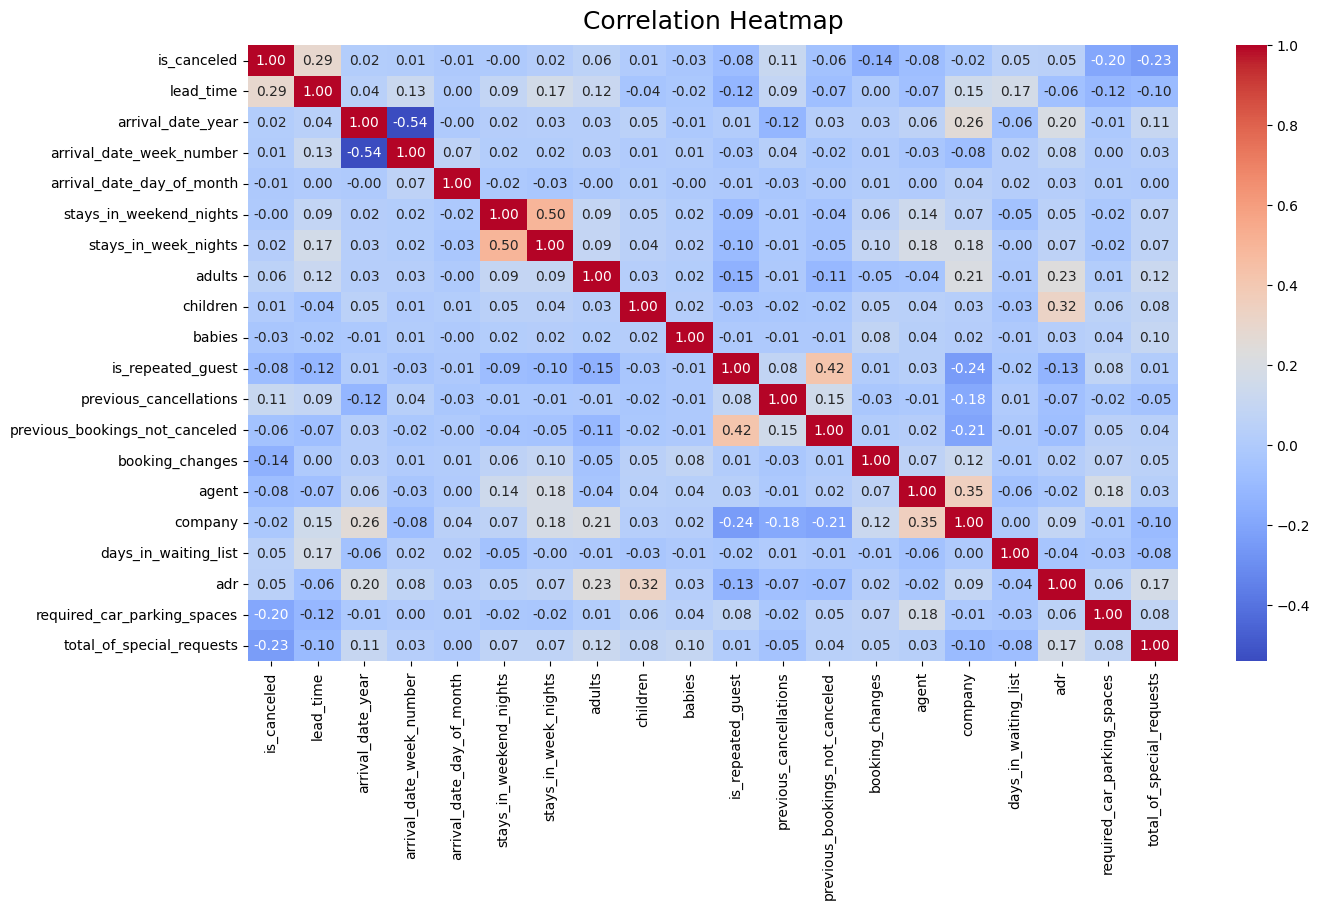

In [ ]:
plt.figure(figsize=(15, 8))
heatmap = sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

<ipython-input-13-d2e843f9781f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(data.corr()[["is_canceled"]].sort_values(by="is_canceled", ascending=False),


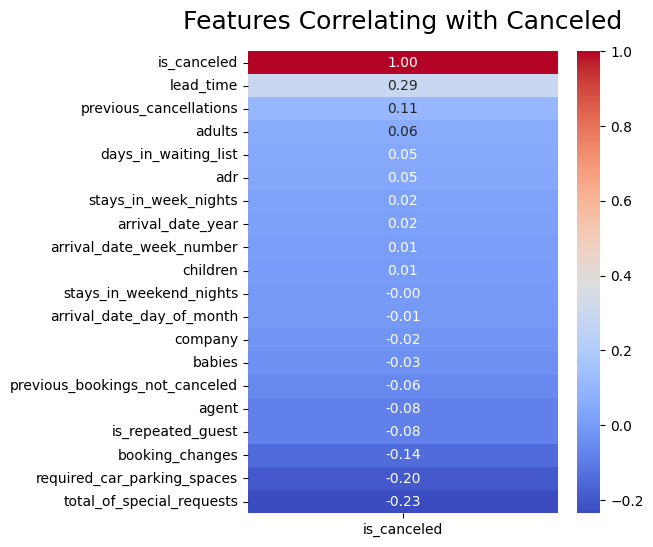

In [ ]:
plt.figure(figsize=(5, 6))
heatmap = sns.heatmap(data.corr()[["is_canceled"]].sort_values(by="is_canceled", ascending=False),
                      annot=True, cmap='coolwarm', fmt=".2f"
)
heatmap.set_title('Features Correlating with Canceled', fontdict={'fontsize':18}, pad=16);

## **Distribution of features**

In [ ]:
def plot_distributions(data, color="blue"):
    """
    This function takes a pandas DataFrame as input and plots the distribution of each feature
    in a single figure. The number of rows and columns in the figure is determined dynamically
    based on the number of features in the DataFrame. The "darkgrid" theme from seaborn is applied
    to the plots. You can specify a color for the bars in the histogram by passing a "color" parameter.
    """
    sns.set_theme(style='whitegrid')  # set the seaborn theme

    n_cols = 3  # set the number of columns per row
    num_features = len(data.columns)
    n_rows = math.ceil(num_features / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
    plt.subplots_adjust(wspace=0.8, hspace=0.5 , bottom=0.30)

    for i, columns in enumerate(data.columns):
        row = i // n_cols
        col = i % n_cols

        sns.histplot(data=data, kde=True, x=columns, ax=axes[row, col], color=color)
        axes[row, col].set_title(f'Distribution of {columns}')
        axes[row, col].set_xlabel(columns)
        axes[row, col].set_ylabel('Frequency')

    fig.tight_layout(pad=2.0)
    plt.show


In [ ]:
selected_col_hist = [

    'lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights',
    'stays_in_week_nights', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr'

]

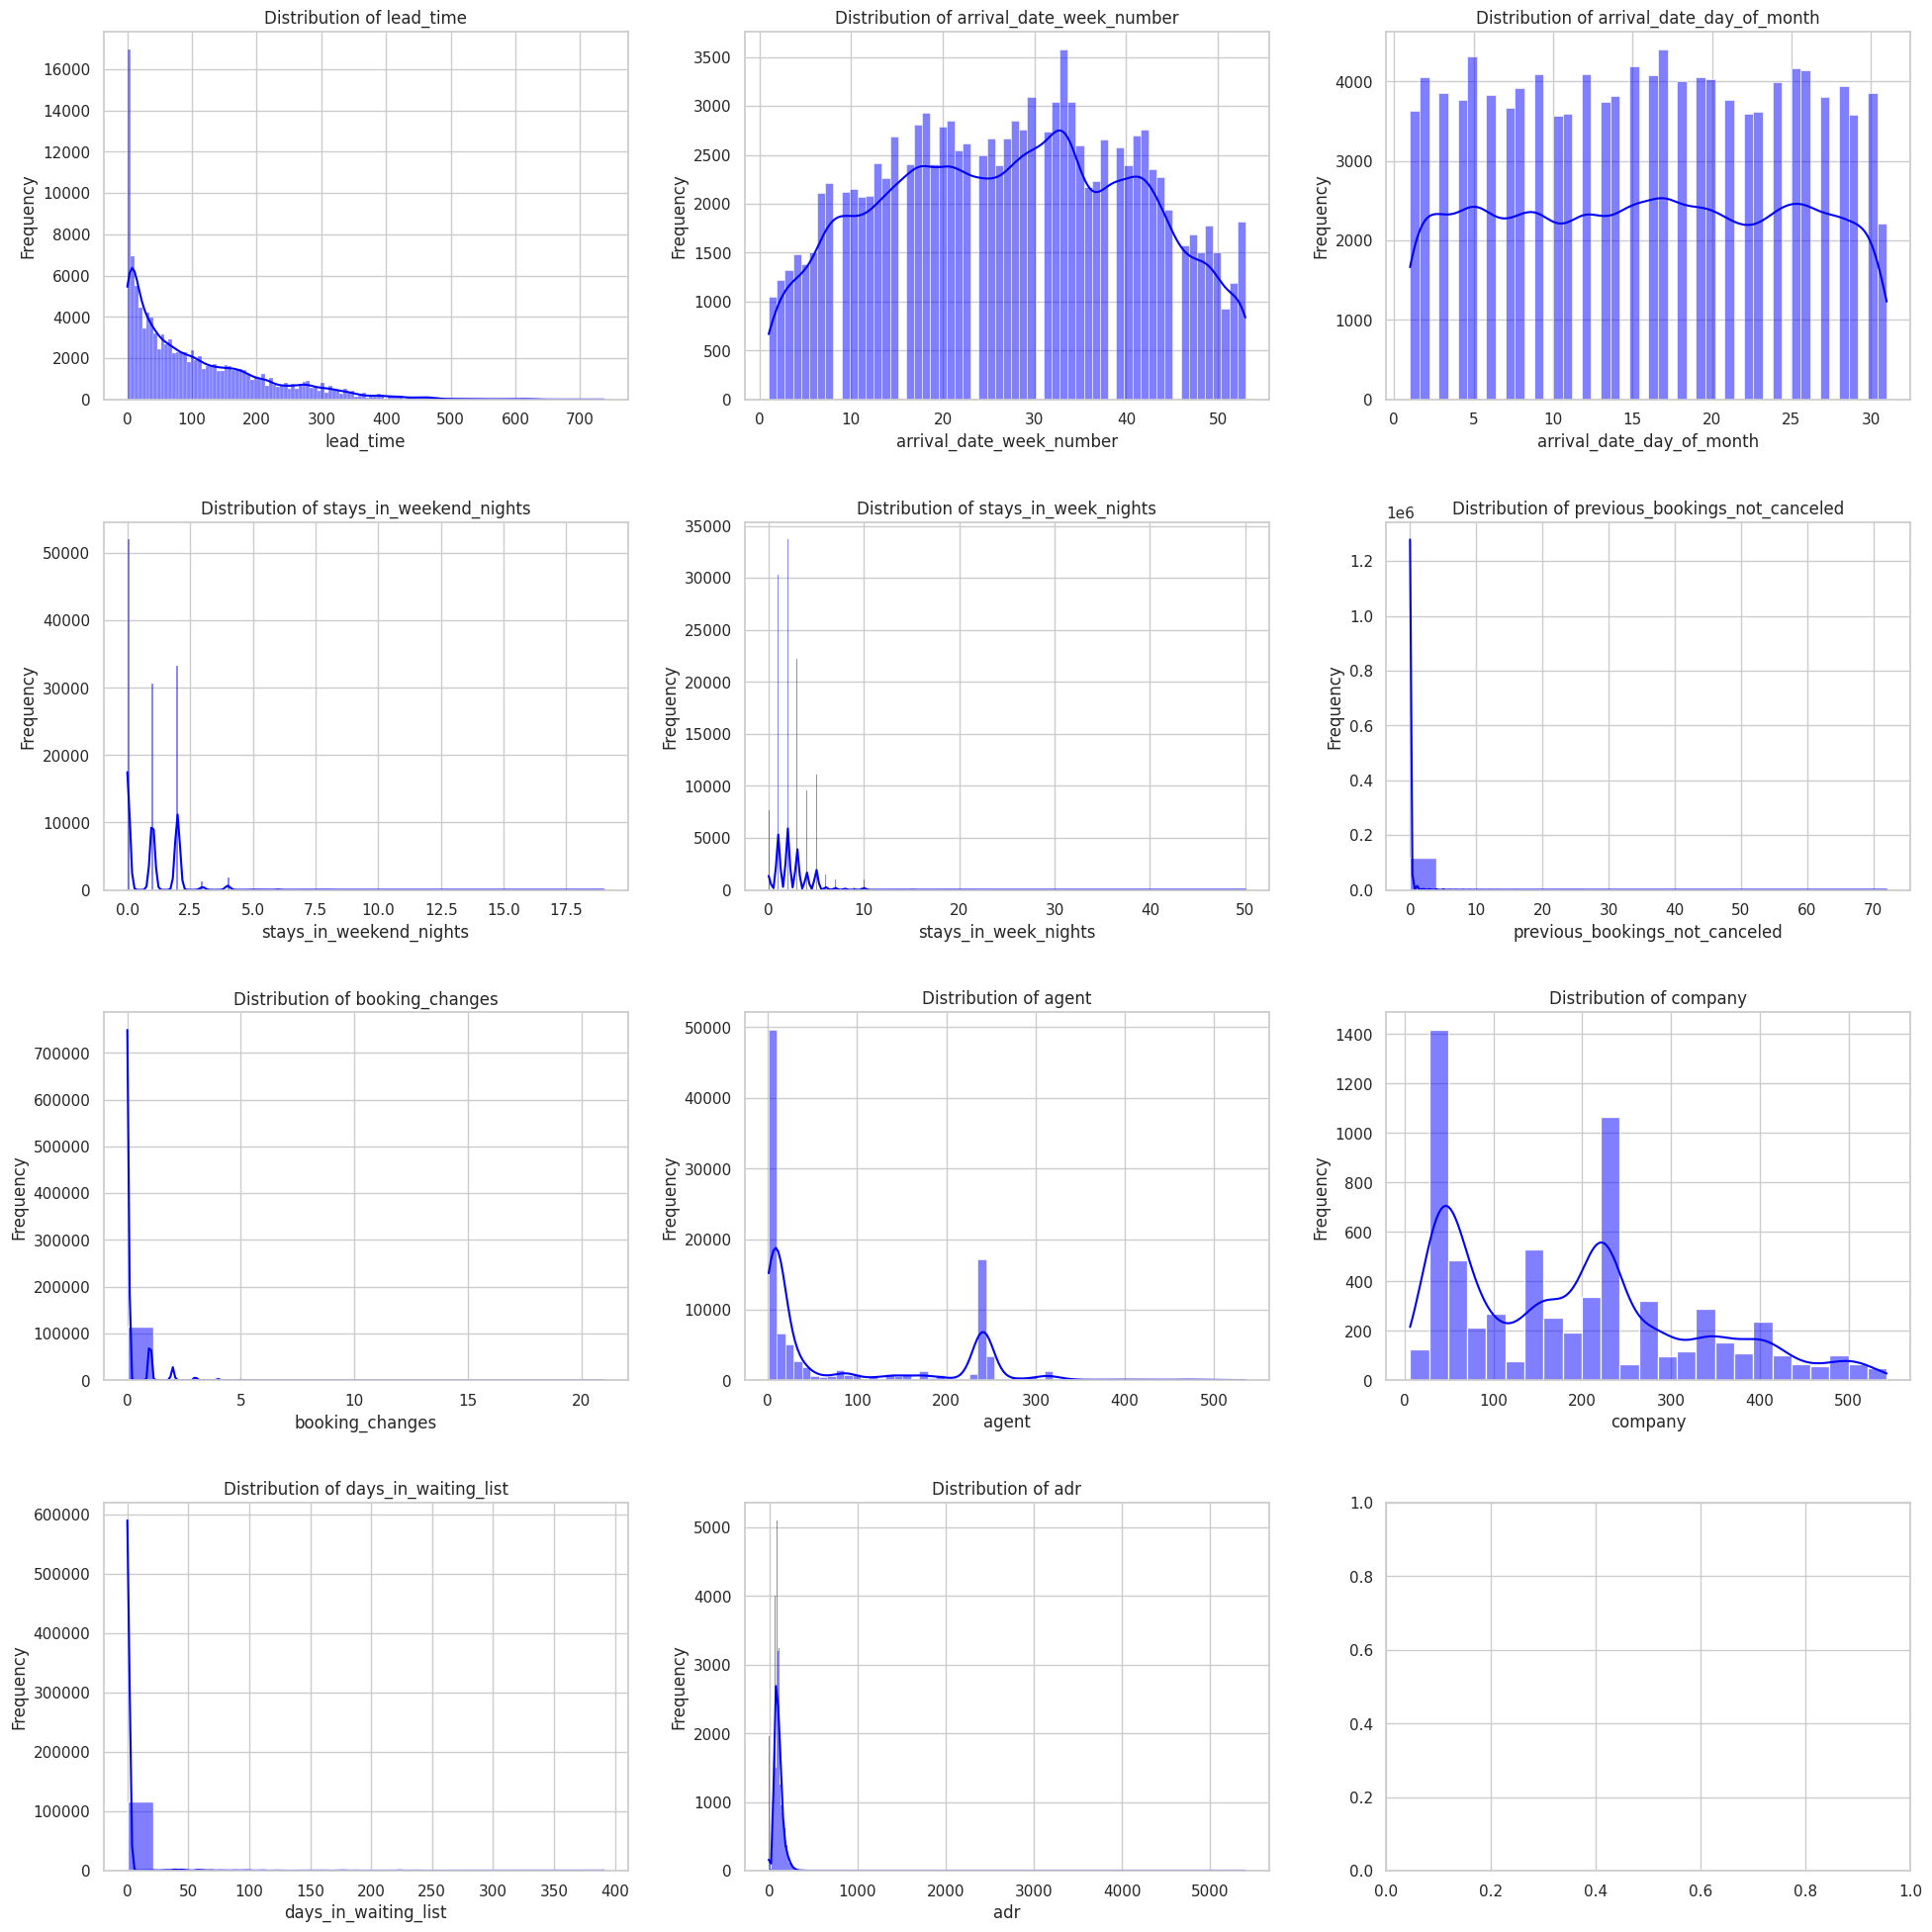

In [ ]:
plot_distributions(data[selected_col_hist])

## **The number of reservation cancellation status**

In [ ]:
data["is_canceled"].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

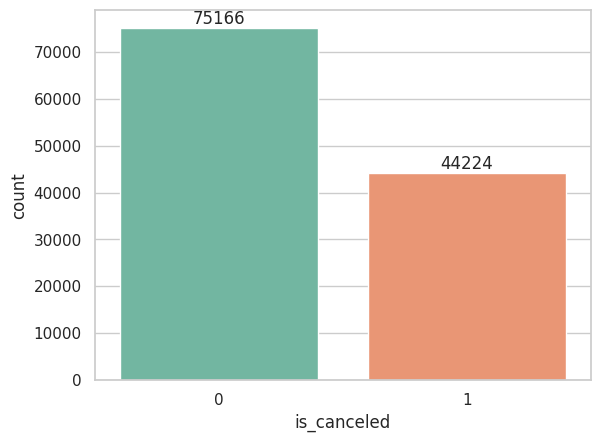

In [ ]:
plt.subplot()
ax = sns.countplot(data=data, x="is_canceled", palette="Set2")
ax.bar_label(ax.containers[0]);

## **The number of previous reservations that have been canceled based on the cancellation status of the reservations**

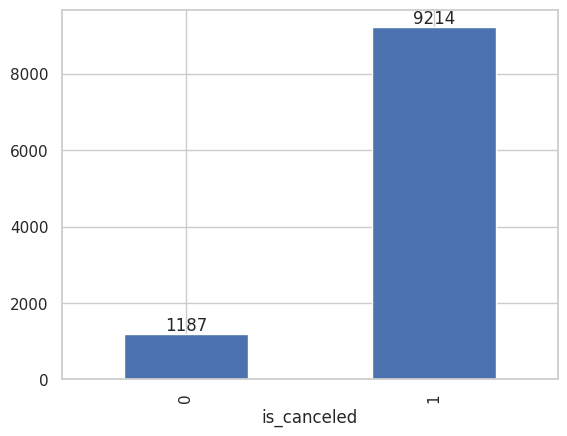

In [ ]:
ax = data.groupby("is_canceled")["previous_cancellations"].sum().plot.bar()
ax.bar_label(ax.containers[0]);

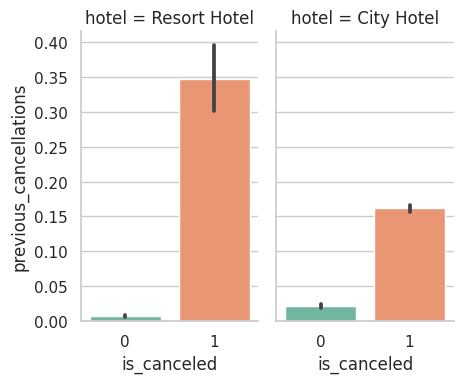

In [ ]:
sns.catplot(
    data=data, x="is_canceled", y="previous_cancellations", col="hotel",
    kind="bar", height=4, aspect=.6, palette="Set2"
)

## **Average hotel prices based on cancellation status**

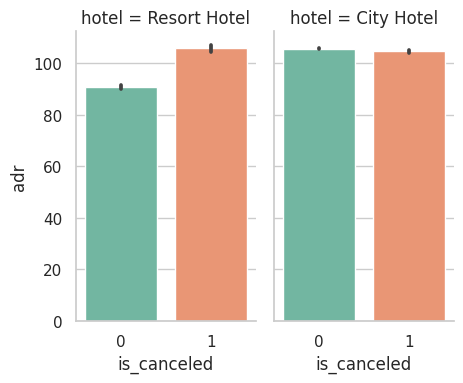

In [ ]:
sns.catplot(
    data=data, x="is_canceled", y="adr", col="hotel",
    kind="bar", height=4, aspect=.6, palette="Set2"
)

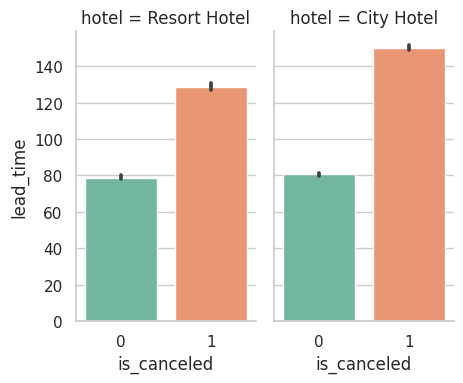

In [ ]:
sns.catplot(
    data=data, x="is_canceled", y="lead_time", col="hotel",
    kind="bar", height=4, aspect=.6, palette="Set2"
)

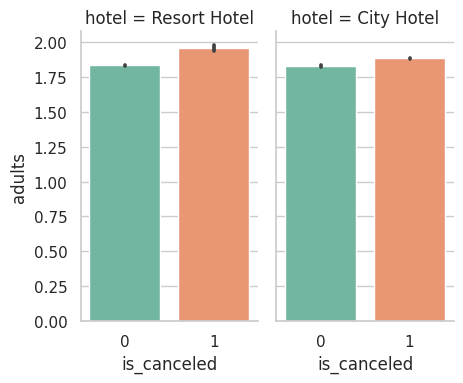

In [ ]:
sns.catplot(
    data=data, x="is_canceled", y="adults", col="hotel",
    kind="bar", height=4, aspect=.6, palette="Set2"
)

## **Distribution of cancellations based on features**

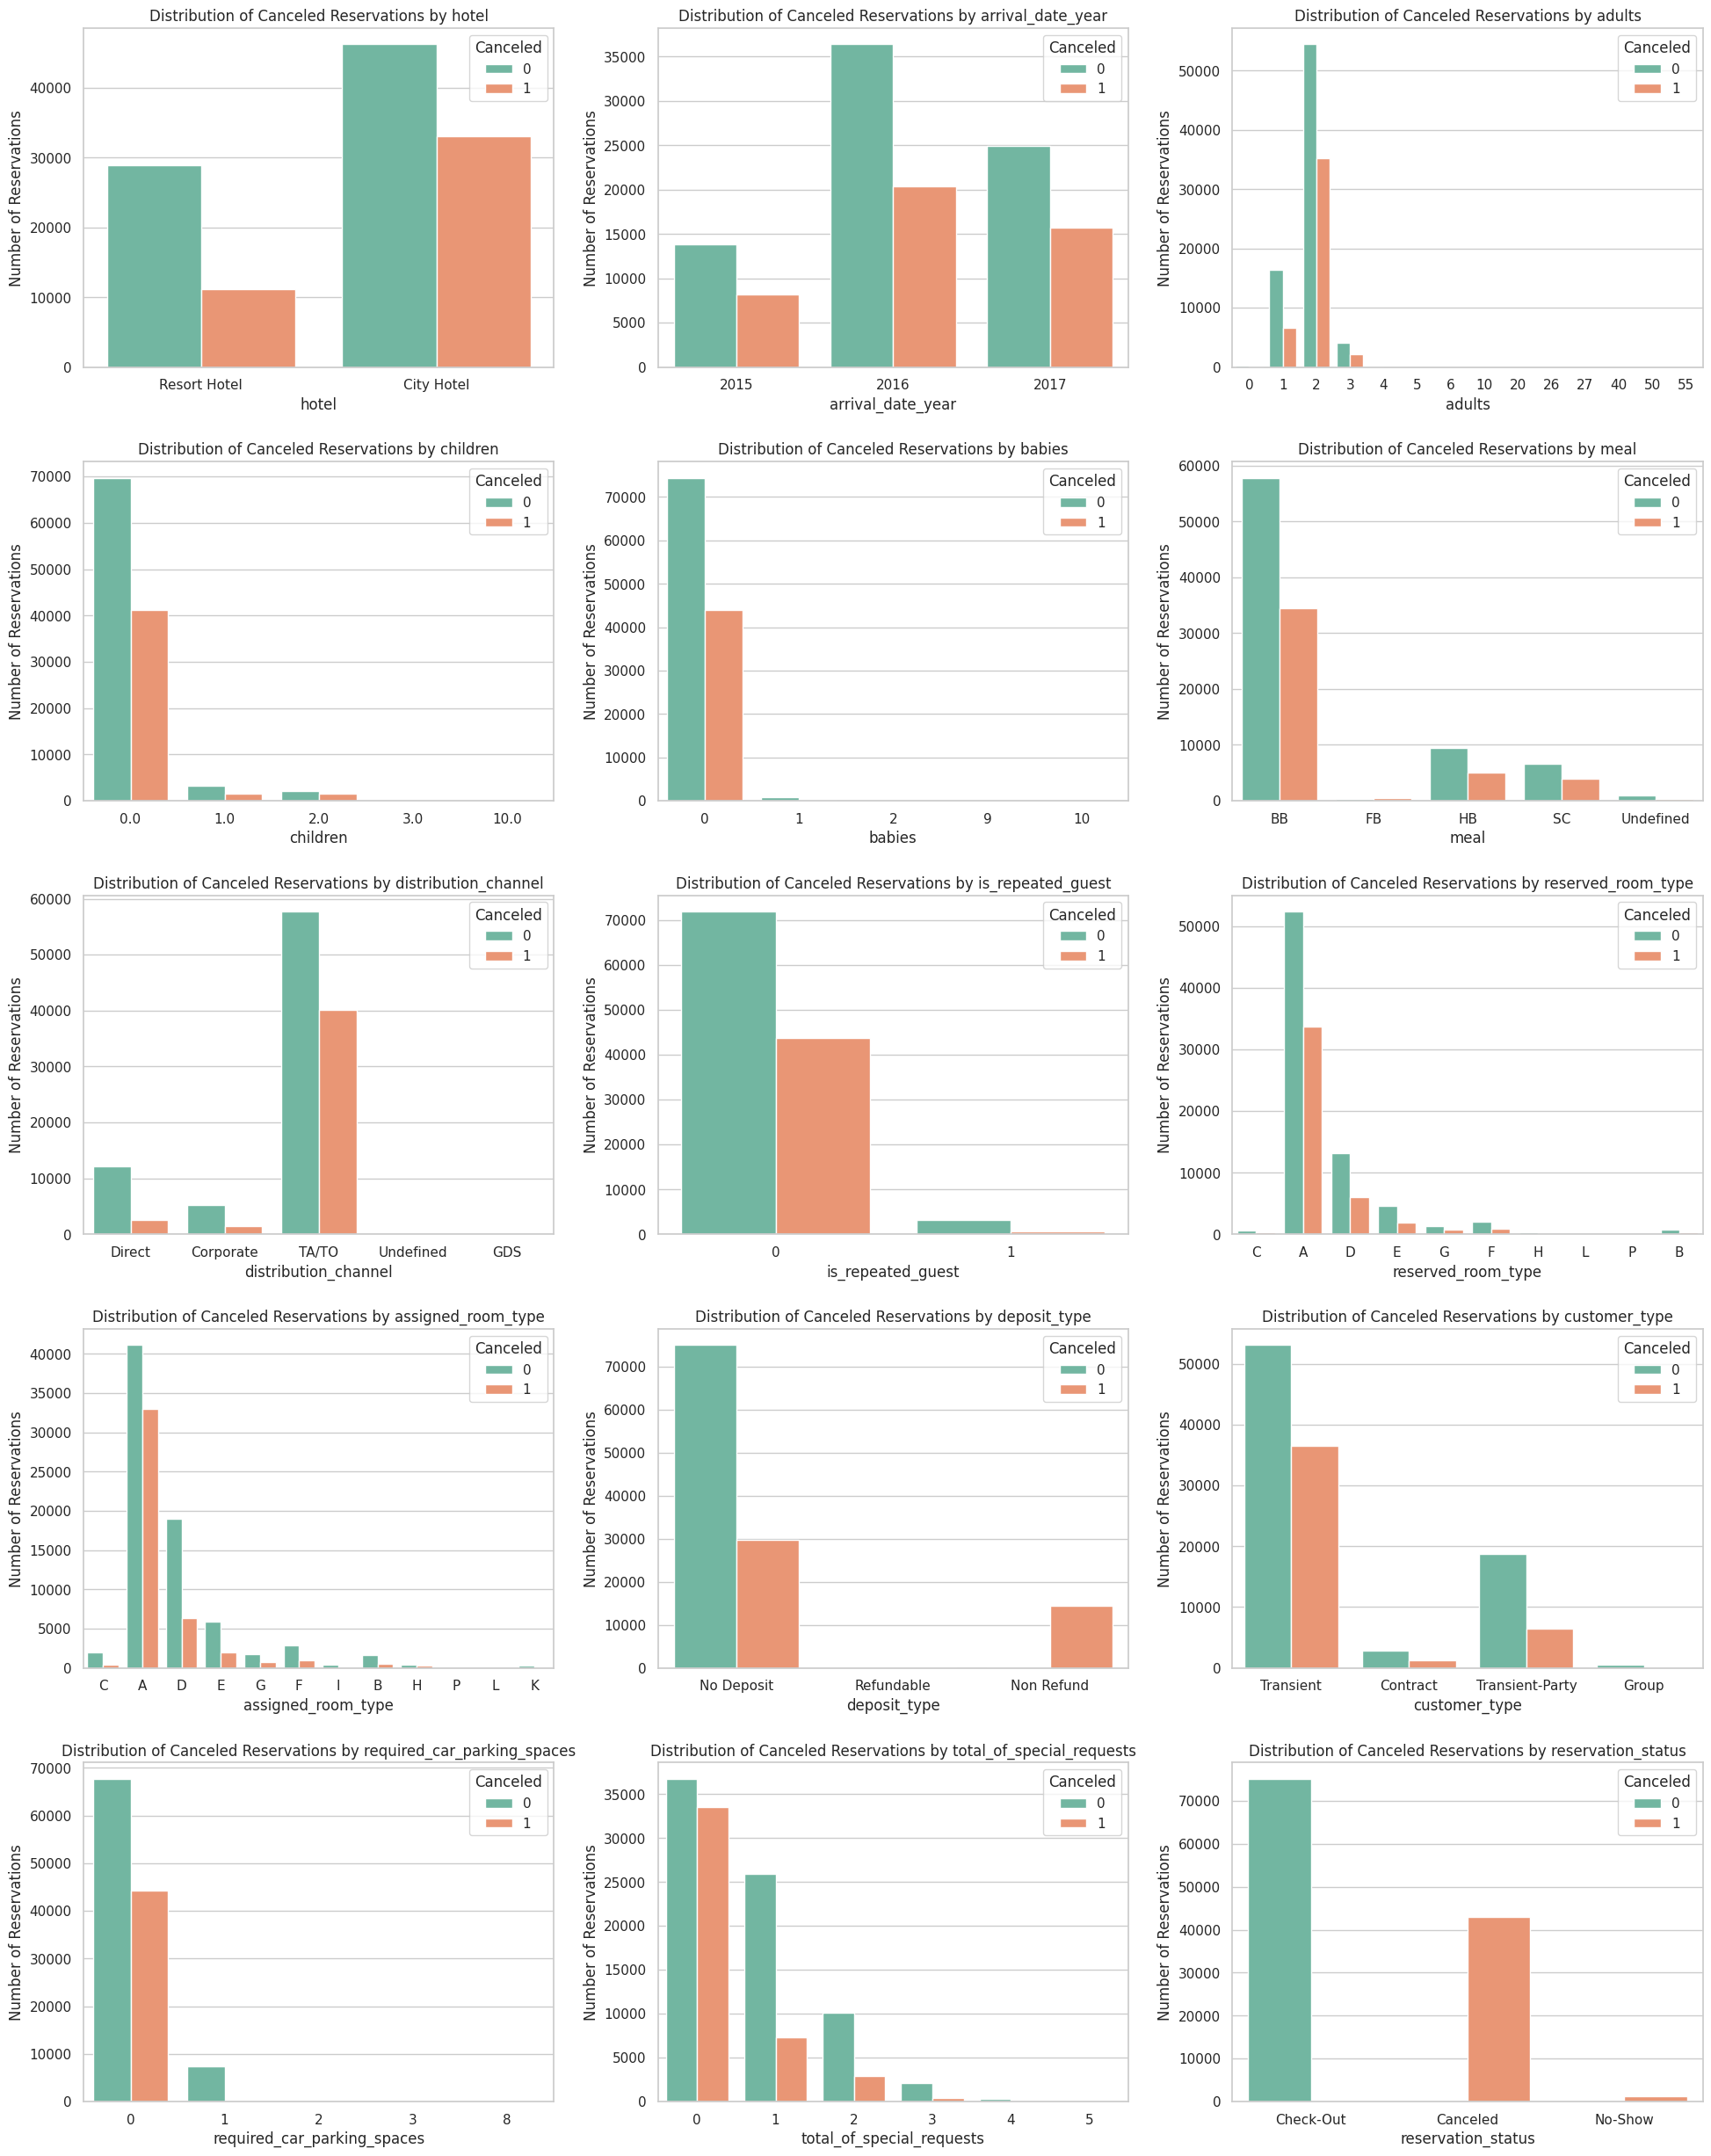

In [ ]:
def canceled_visulizatin(df):

    sns.set_theme(style='whitegrid')  # set the seaborn theme

    n_cols = 3  # set the number of columns per row
    num_features = len(df.columns)
    n_rows = math.ceil(num_features / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
    plt.subplots_adjust(wspace=0.8, hspace=0.5 , bottom=0.30)

    for i, columns in enumerate(df.columns):
        row = i // n_cols
        col = i % n_cols

        sns.countplot(data=data, x=columns, hue='is_canceled', palette="Set2", ax=axes[row, col])
        axes[row, col].set_title(f'Distribution of Canceled Reservations by {columns}')
        axes[row, col].set_xlabel(columns)
        axes[row, col].set_ylabel('Number of Reservations')
        axes[row, col].legend(title='Canceled')

    fig.tight_layout(pad=2.0)
    plt.show




columns_related_to_cancellation = [
    'hotel', 'arrival_date_year','adults', 'children', 'babies', 'meal',
    'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 'assigned_room_type',
    'deposit_type', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status'
]

canceled_visulizatin(data[columns_related_to_cancellation])

## **The number of hotel reservations per month**

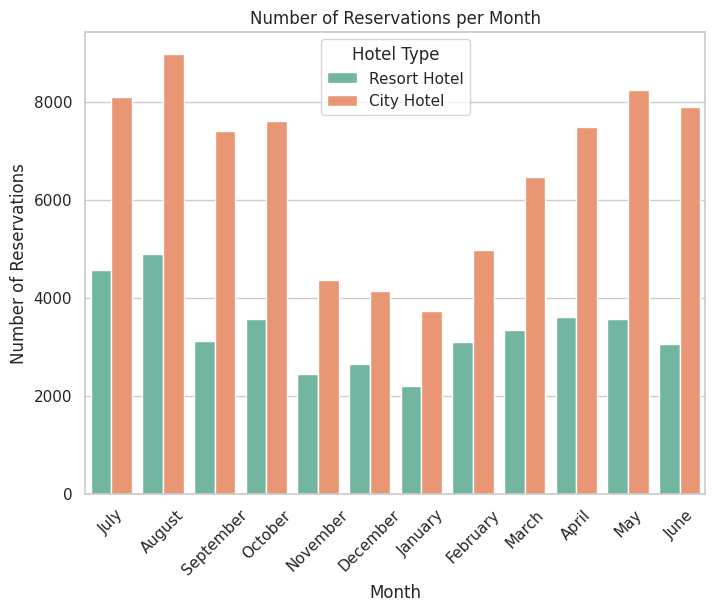

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='arrival_date_month', hue='hotel', palette="Set2")
plt.title('Number of Reservations per Month')
plt.xlabel('Month')
plt.ylabel('Number of Reservations')
plt.xticks(rotation=45)
plt.legend(title='Hotel Type')
plt.show()

## **Distribution of Canceled Reservations by Number of Weekend Nights**

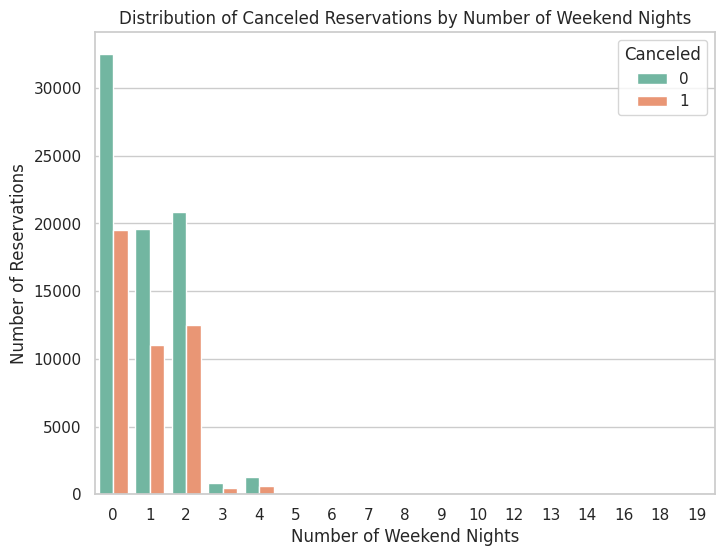

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='stays_in_weekend_nights', hue='is_canceled', palette="Set2")
plt.title('Distribution of Canceled Reservations by Number of Weekend Nights')
plt.xlabel('Number of Weekend Nights')
plt.ylabel('Number of Reservations')
plt.legend(title='Canceled')
plt.show()

## **Distribution of Canceled Reservations by Booking Changes**

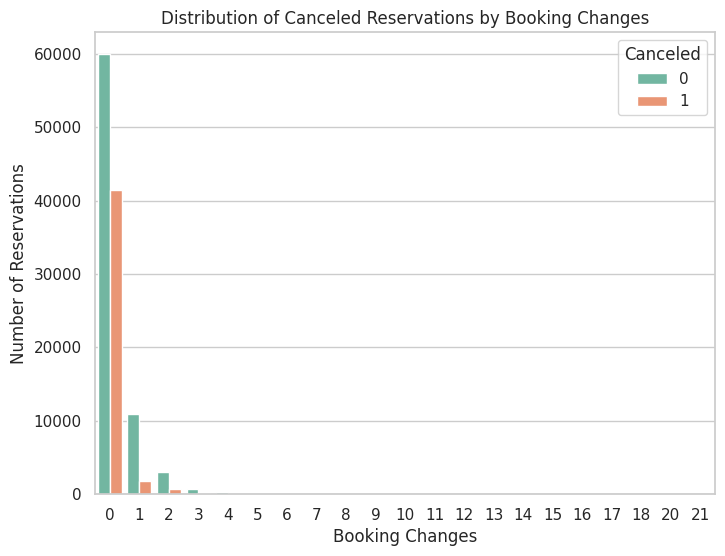

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='booking_changes', hue='is_canceled', palette="Set2")
plt.title('Distribution of Canceled Reservations by Booking Changes')
plt.xlabel('Booking Changes')
plt.ylabel('Number of Reservations')
plt.legend(title='Canceled')
plt.show()

## **Duplicated**

In [ ]:
duplicate_rows = data[data.duplicated()]
print("Number of duplicate data: ", len(duplicate_rows))

In [ ]:
data[data.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card


## **Outlier Data**

<function matplotlib.pyplot.show(close=None, block=None)>

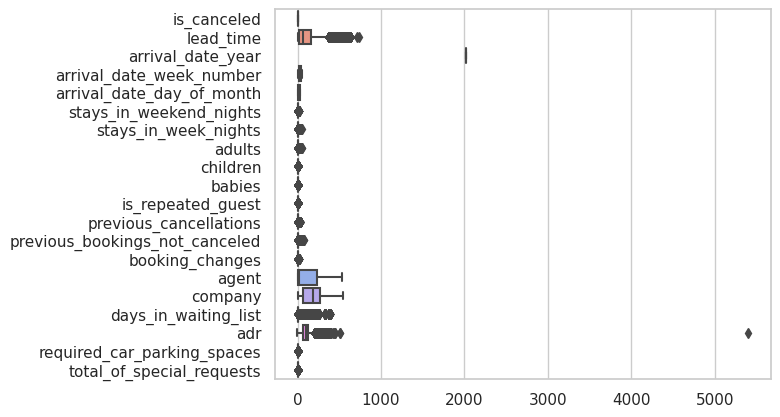

In [ ]:
sns.boxplot(data=data, orient="h")
plt.show

## **Missing Values**

In [ ]:
missing_val = pd.DataFrame(data.isna().sum() / data.shape[0], columns=["pct_missing"])
missing_val["number_of_missing"] = data.isna().sum()
missing_val.style.background_gradient()

,pct_missing,number_of_missing
hotel,0.000000,0
is_canceled,0.000000,0
lead_time,0.000000,0
arrival_date_year,0.000000,0
arrival_date_month,0.000000,0
arrival_date_week_number,0.000000,0
arrival_date_day_of_month,0.000000,0
stays_in_weekend_nights,0.000000,0
stays_in_week_nights,0.000000,0
adults,0.000000,0


# **Functions**

In [ ]:
# Load dataset
def load_data(dataset_path):
    df = pd.read_csv(dataset_path)
    return df

# Clean data
def clean_data(df):
    # remove duplicates
    df.drop_duplicates(inplace=True)

    # remove NaN

    # change type and replace on columns
    df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"])
    df["reservation_date_year"] = df["reservation_status_date"].dt.year
    df["reservation_date_month"] = df["reservation_status_date"].dt.month
    df["reservation_date_day"] = df["reservation_status_date"].dt.day

    df["arrival_date_month"] = df["arrival_date_month"].replace({
        "January": 1, "February": 2, "March":3, "April": 4, "May": 5, "June": 6,
        "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12,})

    # remove columns
    columns_to_drop = ["name", "email", "phone-number", "credit_card", "reservation_status_date", "company"]
    df.drop(columns_to_drop, axis=1, inplace=True)

    # reset index
    df.reset_index(inplace=True, drop=True)

    return df

# Preprocess data
def preprocess_data(df):
    # LabelEncoder
    label_columns = [
        "hotel", "meal", "country", "market_segment",
        "distribution_channel", "reserved_room_type",
        "assigned_room_type", "deposit_type",
        "customer_type", "reservation_status", "country"
    ]

    label_encoder = LabelEncoder()
    for column in label_columns:
        df[column] = label_encoder.fit_transform(df[column])

    return df

# Remove outliers using Z-Score
def remove_outliers_zscore(df, z_threshold=3):
    z_scores = np.abs(stats.zscore(df))
    outlier_indices = np.where(z_scores > z_threshold)

    df_cleaned = df[(z_scores <= z_threshold).all(axis=1)]

    return df_cleaned

# Split and preprocess data
def split_preprocessing_data(df):
    X = df.drop("is_canceled", axis=1)
    y = df["is_canceled"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=380)

    # KNNImputer
    imputer = KNNImputer(n_neighbors=3)
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)

    # Scaler
    ss = StandardScaler()
    X_train = ss.fit_transform(X_train)
    X_test = ss.transform(X_test)

    return X_train, X_test, y_train, y_test

# Train model
def train_model(model, X_train, y_train):
    model_obj = model
    model_obj.fit(X_train, y_train)

    return model_obj

# Evaluate model
def model_evaluation(pre_train_model, X_test, y_test, return_df=True, pipline=False):
    y_pred = pre_train_model.predict(X_test)

    metrics_dict = {
        "accuracy": accuracy_score(y_test, y_pred),
        "f1_score": f1_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred)
    }

    if return_df and pipline == False:
        metrics_df = pd.DataFrame([metrics_dict])
        metrics_df.insert(0, "model", type(pre_train_model).__name__)

        return metrics_df #.style.background_gradient(cmap="coolwarm")

    elif return_df and pipline:
        metrics_df = pd.DataFrame([metrics_dict])
        metrics_df.insert(0, "model", type(pre_train_model.best_estimator_.steps[-1][-1]).__name__)

        return metrics_df #.style.background_gradient(cmap="coolwarm")

    else:
        return metrics_dict

# Model comparison
def model_comparison(models):
    df = load_data("hotel_booking.csv")
    df = clean_data(df)
    df = preprocess_data(df)

    X_train, X_test, y_train, y_test = split_preprocessing_data(df)

    results = []
    for model in models:
        model_t = train_model(model, X_train, y_train)
        results.append(model_evaluation(model_t, X_test, y_test))

    results_df = pd.concat(results, ignore_index=True).sort_values(by="model").reset_index(drop=True)
    return results_df.style.background_gradient(cmap='coolwarm')

In [ ]:
# Define models
models = [
    KNeighborsClassifier(),
    AdaBoostClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    xgb.XGBClassifier(),
    RandomForestClassifier()
]

# Run model comparison
model_comparison(models)

,model,accuracy,f1_score,recall,precision
0,AdaBoostClassifier,1.000000,1.000000,1.000000,1.000000
1,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000
2,KNeighborsClassifier,0.986431,0.981249,0.965382,0.997646
3,RandomForestClassifier,0.999866,0.999818,0.999636,1.000000
4,SVC,0.998794,0.998358,0.996812,0.999909
5,XGBClassifier,1.000000,1.000000,1.000000,1.000000


# **Hyperparameter Tuning**

In [ ]:
df = load_data("hotel_booking.csv")
df_cleaned = clean_data(df)
df_preprocessed = preprocess_data(df_cleaned)
X_train, X_test, y_train, y_test = split_preprocessing_data(df_preprocessed)

In [ ]:
pipe_lr = Pipeline([("scl", StandardScaler()),
                  ("LR", LogisticRegression(random_state=42))])

pipe_dt = Pipeline([("scl", StandardScaler()),
                    ("DT",DecisionTreeClassifier(random_state=42))])

pipe_rf = Pipeline([("scl", StandardScaler()),
                    ("RF",RandomForestClassifier(random_state=42))])

pipe_knn = Pipeline([("scl", StandardScaler()),
                    ("KNN", KNeighborsClassifier())])

pipe_svm = Pipeline([("scl", StandardScaler()),
                     ("SVM", SVC(random_state=42))])

pipe_adaboost = Pipeline([("scl", StandardScaler()),
                     ("adaboost", AdaBoostClassifier(random_state=42))])

pipe_xgb = Pipeline([("scl", StandardScaler()),
                     ("XGB", xgb.XGBClassifier(random_state=42))])

In [ ]:
param_range = [1, 2, 3, 4, 5, 6]
param_range_fl = [1.0, 0.5, 0.1]
n_estimators = [50, 100, 150, 1000]
learning_rates = [.1, .2, .3]


lr_param_grid = [{
    'LR__penalty': ['l1', 'l2'],
    'LR__C': param_range_fl,
    'LR__solver': ['liblinear']
}]


dt_param_grid = [{
    'DT__criterion': ['gini', 'entropy'],
    'DT__min_samples_leaf': param_range,
    'DT__max_depth': param_range,
    'DT__min_samples_split': param_range[1:]
}]


rf_param_grid = [{
    'RF__min_samples_leaf': param_range,
    'RF__max_depth': param_range,
    'RF__min_samples_split': param_range[1:],
    'RF__min_samples_leaf': param_range[:4],
    'RF__n_estimators': n_estimators
}]


knn_param_grid = [{
    'KNN__n_neighbors': param_range,
    'KNN__weights': ['uniform', 'distance'],
    'KNN__metric': ['euclidean', 'manhattan']
}]


svm_param_grid = [{
    'SVM__kernel': ['linear', 'rbf'],
    'SVM__C': param_range,
}]


xgb_param_grid = [{
    'XGB__learning_rate': learning_rates,
    'XGB__max_depth': param_range,
    'XGB__min_child_weight': param_range[:2],
    'XGB__subsample': param_range_fl,
    'XGB__n_estimators': n_estimators
}]

In [ ]:
lr_grid_search = GridSearchCV(
    estimator=pipe_lr,
    param_grid=lr_param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=10
)

dt_grid_search = GridSearchCV(
    estimator=pipe_dt,
    param_grid=dt_param_grid,

    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=10
)

rf_grid_search = GridSearchCV(
    estimator=pipe_rf,
    param_grid=rf_param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=10
)

knn_grid_search = GridSearchCV(
    estimator=pipe_knn,
    param_grid=knn_param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=10
)

svm_grid_search = GridSearchCV(
    estimator=pipe_svm,
    param_grid=svm_param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=10
)

xgb_grid_search = GridSearchCV(
    estimator=pipe_xgb,
    param_grid=xgb_param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=10
)

In [ ]:
grids = [
    # lr_grid_search,
    # dt_grid_search,
    # rf_grid_search,
    # knn_grid_search,
    # svm_grid_search,
    xgb_grid_search
]

for pipe in grids:
    pipe.fit(X_train,y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [ ]:
grid_dict1 = {0: 'Logistic Regression', 1: 'Decision Trees',
             2: 'Random Forest', 3: 'K-Nearest Neighbors',
             4: 'Support Vector Machines', 5: 'XGBoost'}
for i, model in enumerate(grids):
    print('{} Test Accuracy: {}'.format(grid_dict1[i], model.score(X_test,y_test)))
    print('{} Best Params: {}'.format(grid_dict1[i], model.best_params_))
    print('-'*100)

Logistic Regression Test Accuracy: 0.9850002307656806
Logistic Regression Best Params: {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 4, 'KNN__weights': 'distance'}
----------------------------------------------------------------------------------------------------


In [ ]:
grid_dict2 = {0: 'Logistic Regression', 1: 'Decision Trees',
             2: 'Random Forest', 3: 'K-Nearest Neighbors',
             4: 'Support Vector Machines', 5: 'XGBoost'}

pd.concat([model_evaluation(model, X_test, y_test, return_df=True, pipline=True) for i, model in enumerate(grids)], ignore_index=True).style.background_gradient(cmap='coolwarm')

,model,accuracy,f1_score,recall,precision
0,KNeighborsClassifier,0.989111,0.985000,0.972124,0.998223
